In [1]:
## Import statements
from currency_converter import CurrencyConverter
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.stats.mstats import winsorize
from scipy.stats import boxcox, jarque_bera, normaltest
import seaborn as sns
# from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.metrics import mean_absolute_error
# import statsmodels.api as sm
# from statsmodels.tools.eval_measures import mse, rmse
# from sqlalchemy import create_engine
from IPython.display import Markdown, display
# import scipy
import warnings
warnings.filterwarnings('ignore')

# random seed
random.seed(99)

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
def printmd(string):
    "prints text in bold"
    display(Markdown(string))

import warnings
warnings.filterwarnings(action="ignore")


In [2]:
data_2016 = pd.read_csv('2016.csv', encoding='Windows-1252')
data_2018 = pd.read_csv('2018.csv')

## Exploratory Data Analysis

### Data Cleaning

In [3]:
data_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,nan
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,nan
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,nan


We have 4 columns with no names and seemingly no values. Let's find out what brought them to our dataset:

In [4]:
data_2016.rename(columns={'Unnamed: 13':'a','Unnamed: 14':'b','Unnamed: 15':'c','Unnamed: 16':'d'},inplace=True)
for i in ['a','b','c','d']:
    printmd (i+':\n')
    print (np.unique(data_2016[i].astype(str)))

a:


['0' '0.0' '0.75115847' '0.80140149' '1' '1.0' '1.45244126' '1.48867786'
 '10' '10.0' '100' '100.0' '1010' '103' '1035' '1042.03499794' '1056'
 '106' '106.2801604094' '1077.37173925' '10890.45' '109.0' '109301.56'
 '110.0' '1100' '11044' '11050' '1111.11' '111307.22' '113.5076443'
 '11315.5' '11397.1752216' '1146' '115.0' '11558' '11565' '11719'
 '1172.45147332' '118.0' '1181.0' '119.79380659999998' '1191.0' '12'
 '120.79453167' '1200' '1213.48105085' '12201' '123' '12306' '125' '125.0'
 '12590' '126.9669968' '1270' '1273.06045123' '1295' '1296' '1297.8116879'
 '13' '130' '130.0' '130.16' '130.443914' '1301.0' '1320' '1327.89' '1342'
 '13436.602656755' '13446.90533288' '135' '1366' '13675' '140.01' '1400'
 '14032.77' '1410' '14159' '1421' '14309.36' '145' '1495' '15' '15.0'
 '150' '150.0' '15096.0' '15097.07923963' '1520' '1526.6162255000002'
 '1528.82718156' '15361' '15665' '157.0' '157323.21' '1577' '15816.0'
 '1595.0' '16' '16.0157339' '160' '1600.0' '163.9631751' '165.0' '166'
 '16

b:


['0.0' '1' '128534.58772366401' '20.0' '26.0' '401.0' '435.0' 'US' 'nan']


c:


['0' '0.0' '9854.0' 'US' 'nan']


d:


['25.0' 'nan']


Looking at their values and the portion of data displayed above, the additional unknown columns seem to represent rows where values have been misplaced. since we have a considerable number of misplaced rows that can help us in subsequent phases of this project, let's look at these rows and see if they can be put back in place:

In [5]:
print (data_2016.columns)
data_2016[~data_2016['a'].isnull()]


Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'a', 'b', 'c', 'd'],
      dtype='object')


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,a,b,c,d
1454,1008705746,Zephyra´s new full length,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,NaN,NaN,nan
1563,1009317190,French Cuisine,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,NaN,NaN,nan
1794,1010871699,The Beginners Guide to being Unsuicidal,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,NaN,NaN,nan
1931,1011687764,Best OnLine Classifieds,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,NaN,NaN,nan
2420,101453314,Social Media Ruined My Life,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,NaN,NaN,nan
3079,1018515072,The Secret Lives of Baba Segi's Wives,A Workshop Production,Plays,Theater,GBP,2015-12-14 01:00:00,3000,2015-11-15 14:29:36,3273,successful,46,GB,4986.41798748,NaN,NaN,nan
4850,1028998661,The Easyhook Driver Bit,Cuphook Installation Made Easy,Hardware,Technology,USD,2014-09-28 02:22:52,25000,2014-07-30 02:22:52,590,failed,35,US,590,NaN,NaN,nan
4871,102911383,AVES: Bicycle playing cards,Fine Art deck inspired by Birds,Playing Cards,Games,USD,2014-10-07 18:00:29,10000,2014-09-01 18:00:29,23924,successful,780,US,23924,NaN,NaN,nan
5049,1030235554,Love's in Need Of Love,Now.,World Music,Music,USD,2013-03-13 00:00:00,12000,2013-02-08 23:58:25,12306,successful,122,US,12306,NaN,NaN,nan
5813,1034539612,Batman Dead End,A Ten Year Retrospective,Film & Video,Film & Video,USD,2013-03-28 15:03:32,12500,2013-02-26 16:03:32,13675,successful,213,US,13675,NaN,NaN,nan


The first thing we notice is that all original column names have trailing whitespaces, which will be removed.

We have 625 rows of misplaced data. The good thing is that the data is uniformly misplaced, meaning we can correct all of them in one block of code. The problem seems to be that some projects have secondary titles, which were carried over to the *category* column, causing a rightward shift in subsequent values for each observation. Rows that have shifted further with values in columns b, c, or d, will be removed:

In [6]:
# data_2016['backers'] = np.log(data_2016['backers'].astype(int)
# Remove whitespace from column names
data_2016.columns = data_2016.columns.str.strip()

# Put misplaced rows back in place
for index in data_2016[~data_2016['a'].isnull()].index:
    
    # Add secondary title to value in name column
    data_2016.at[index, 'name'] = str(data_2016.at[index, 'name']) + str(data_2016.at[index, 'category'])
    
    # Shift values in subsequent columns to the left
    for i in range(1,14):
        if i == 13:
            break
        data_2016.at[index, data_2016.columns[i]] = data_2016.at[index, data_2016.columns[i+1]]

Let's take a look at what we have after that:

In [7]:
data_2016[~data_2016['a'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,a,b,c,d
1454,1008705746,'As The World Collapses',Metal,Music,SEK,2016-02-02 00:56:46,15000,2016-01-03 00:56:46,4262,failed,14,SE,504.94765278,504.94765278,NaN,NaN,nan
1563,1009317190,A Traditional Experience,Cookbooks,Food,USD,2014-09-08 00:46:23,13730,2014-08-09 03:16:02,3984,failed,46,US,3984,3984,NaN,NaN,nan
1794,1010871699,the one act,Theater,Theater,USD,2011-12-31 23:25:46,5000,2011-11-21 23:25:46,525,failed,10,US,525,525,NaN,NaN,nan
1931,1011687764,Ever / No More Spam,Web,Technology,USD,2014-09-20 19:56:10,6300,2014-08-21 19:56:10,0,failed,0,US,0,0,NaN,NaN,nan
2420,101453314,A Short Film from Adam S Curtis,Shorts,Film & Video,USD,2013-03-14 20:11:57,3000,2013-02-25 21:11:57,3035,successful,42,US,3035,3035,NaN,NaN,nan


Good! Row values are back in place and we are ready to proceed.

In [8]:
# Drop column a
data_2016.drop(columns=['a'], inplace=True)

# Missing values
printmd('Missing Values:')
data_2016.isnull().sum()

Missing Values:

ID                    0
name                  9
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged        3790
b                323738
c                323746
d                323749
dtype: int64

The missing values in the name column should not be a problem since the main goal of this project is not to identify individual projects, although it would be useful for this section. As for the usd_pledged missing values, let's take a look at how these rows look like:

In [9]:
data_2016[data_2016['usd pledged'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,b,c,d
150,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20 06:59:00,6500,2014-08-06 21:28:36,555,undefined,0,"N,""0",NaN,NaN,NaN,nan
287,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25 23:00:00,4500,2015-08-04 12:05:17,4767,undefined,0,"N,""0",NaN,NaN,NaN,nan
549,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09 21:06:13,3500,2015-03-10 20:06:13,3576,undefined,0,"N,""0",NaN,NaN,NaN,nan
561,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26 10:59:00,6000,2015-11-02 22:09:19,7007.8,undefined,0,"N,""0",NaN,NaN,NaN,nan
650,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21 06:00:00,3000,2016-02-23 03:09:49,3660.38,undefined,0,"N,""0",NaN,NaN,NaN,nan
714,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10 22:51:01,4000,2014-09-10 22:51:01,4760,undefined,0,"N,""0",NaN,NaN,NaN,nan
730,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11 04:00:00,5000,2015-05-15 02:12:35,6370,undefined,0,"N,""0",NaN,NaN,NaN,nan
747,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07 08:59:00,6000,2015-10-10 18:45:24,6695,undefined,0,"N,""0",NaN,NaN,NaN,nan
751,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28 18:28:27,2750,2015-02-11 19:28:27,2926,undefined,0,"N,""0",NaN,NaN,NaN,nan
765,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11 21:02:55,1200,2015-11-11 21:02:55,1585,undefined,0,"N,""0",NaN,NaN,NaN,nan


The *usd pledged* column is nothing but the same value in the *pledged* column, only converted to USD. After using the different currencies we have to predict missing values in the *country* column (which do not show in the isnull().sum() call above), we will then convert all currencies to USD based on their launch date and will get rid of a few columns in the process:

In [10]:
for state in np.unique(data_2016[data_2016['usd pledged'].isnull()]['state']):
    printmd('{} projects:'.format(state))
    print((data_2016[data_2016['usd pledged'].isnull()]['state']==state).sum())

canceled projects:

22


failed projects:

105


live projects:

1


successful projects:

105


suspended projects:

2


undefined projects:

3555


Not all of these projects are failures. Since we have a significant portion of the data with missing data here, we can try to fill up as much as we can:

- For the country column, we can use fill them in according to the corresponding value in the currency column.


- Projects that are canceled or suspended can also be labeled as failed. Since our goal here to predict whether a project will go through or not, we do not really care whether it was canceled or suspended as long as it will not succeed. Also, projects that are live can be labeled as successful.


- Projects with states that are undefined will be inspected closely before I make a decision on replacing their status.

In [11]:
# Remove corrupt rows, in addition to columns b, c, and d:
# For the index arg, we got indexes of rows that are not null in column b
data_2016.drop(index=data_2016[~data_2016['b'].isnull()].index.to_list(),columns=['b','c','d'], inplace=True)

# Drop some more misplaced rows
data_2016.drop(index=data_2016[data_2016['country']=='0'].index.to_list(), inplace=True)

np.unique(data_2016['country'])

array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
       'IE', 'IT', 'LU', 'MX', 'N,"0', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US'],
      dtype=object)

In [12]:
# data_2016[['country','currency']].groupby(by=['country']).count()
data_2016.groupby(by=['currency','country']).count()

ID    name  category  main_category  deadline    goal  \
currency country                                                              
AUD      AU         6251    6251      6251           6251      6251    6251   
         N,"0        111     111       111            111       111     111   
CAD      CA        12008   12008     12008          12008     12008   12008   
         N,"0        205     205       205            205       205     205   
CHF      CH          471     471       471            471       471     471   
         N,"0          7       7         7              7         7       7   
DKK      DK          825     825       825            825       825     825   
         N,"0         16      16        16             16        16      16   
EUR      AT          377     377       377            377       377     377   
         BE          402     402       402            402       402     402   
         DE         2685    2685      2685           2685      2685    2685   
         ES         1373    1373      1373           1373      1373    1373   
         FR         1912    1912      1912           1912      1912    1912   
         IE          576     576       576            576       576     576   
         IT         1751    1751      1751           1751      1751    1751   
         LU           40      40        40             40        40      40   
         N,"0        186     186       186            186       186     186   
         NL         2265    2265      2265           2265      2265    2265   
GBP      GB        27572   27570     27572          27572     27572   27572   
         N,"0        459     459       459            459       459     459   
HKD      HK           97      97        97             97        97      97   
MXN      MX          214     214       214            214       214     214   
NOK      N,"0         14      14        14             14        14      14   
         NO          526     526       526            526       526     526   
NZD      N,"0         28      28        28             28        28      28   
         NZ         1137    1137      1137           1137      1137    1137   
SEK      N,"0         31      31        31             31        31      31   
         SE         1271    1271      1271           1271      1271    1271   
SGD      SG          120     120       120            120       120     120   
USD      N,"0       2733    2733      2733           2733      2733    2733   
         US       258068  258061    258068         258068    258068  258068   

                  launched  pledged   state  backers  usd pledged  
currency country                                                   
AUD      AU           6251     6251    6251     6251         6251  
         N,"0          111      111     111      111            0  
CAD      CA          12008    12008   12008    12008        12008  
         N,"0          205      205     205      205            0  
CHF      CH            471      471     471      471          471  
         N,"0            7        7       7        7            0  
DKK      DK            825      825     825      825          825  
         N,"0           16       16      16       16            0  
EUR      AT            377      377     377      377          377  
         BE            402      402     402      402          402  
         DE           2685     2685    2685     2685         2685  
         ES           1373     1373    1373     1373         1373  
         FR           1912     1912    1912     1912         1912  
         IE            576      576     576      576          576  
         IT           1751     1751    1751     1751         1751  
         LU             40       40      40       40           40  
         N,"0          186      186     186      186            0  
         NL           2265     2265    2265     2265         2265  
GBP      GB          27572    27572   27572    27572  

To fill in the country column replacing the *N,"0* value, we will build a dictionary containing countries and currencies, then fill accordingly. As for European countries with many possibilities for the Euro, we will fill countries in randomly:

In [13]:
cntry_x_curr = {}

for curr in np.unique(data_2016['currency']):
    
    # slice df containing it
    temp_df = data_2016[data_2016['currency']==curr]
    
    # get unique vals of country, convert to list
    countries = list(np.unique(temp_df['country']))
    
    # remove N,"0 from list
    if 'N,"0' in countries:
        countries.remove('N,"0')
    
    # Set currency as key, countries as value in the dictionary
    cntry_x_curr[curr] = countries



# Loop over rows of N,"0, fill values according to dict
for index in data_2016[data_2016['country']=='N,"0'].index:
    
    # if Euro, select a country randomly
    if data_2016.at[index, 'currency'] == 'EUR':
        data_2016.at[index, 'country'] = random.choice(cntry_x_curr['EUR'])
        continue
        
    # fill country with corresponding currency value
    data_2016.at[index, 'country'] = random.choice(cntry_x_curr[data_2016.at[index, 'currency']])

Now that we have filled in values for the *country* column, let's move on to replacing *undefined* values for the *state* column:

In [14]:
np.unique(data_2016['state'])
data_2016['backers'] = data_2016['backers'].astype(int)

In [15]:
bin_dict = {'canceled':'failed','failed':'failed', 'live':'successful','successful':'successful','suspended':'failed'}
# Loop over rows of state and 'binarize' values
for index in data_2016.index:
    if data_2016.at[index, 'state'] != 'undefined':
        data_2016.at[index, 'state'] = bin_dict[data_2016.at[index, 'state']]
print('We are left with {} undefined rows'.format(len(data_2016[data_2016['state']=='undefined'])))

We are left with 3555 undefined rows


Let's take a look at projects that failed and see whether we can set a threshold for the amount collected as a percentage of the goal amount:

99th Percentile for failed projects: 

0.7516666666666667


Failed projects quick stats:

count   202492.000
mean         0.316
std         48.614
min          0.000
25%          0.000
50%          0.016
75%          0.108
max      16949.000
Name: raised, dtype: float64


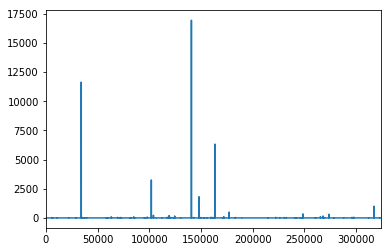

In [16]:
data_2016['pledged'] = data_2016['pledged'].astype(float)
data_2016['goal'] = data_2016['goal'].astype(float)
fail_df = data_2016[data_2016['state']=='failed']
fail_df['raised'] = fail_df['pledged']/fail_df['goal']
printmd('99th Percentile for failed projects: ')
print(fail_df['raised'].quantile(q=0.99))
printmd('Failed projects quick stats:')
print(fail_df['raised'].describe())
fail_df['raised'].plot()

In [17]:
success_df = data_2016[data_2016['state']=='successful']
success_df['raised'] = success_df['pledged']/success_df['goal']
printmd('99th Percentile for successful projects: ')
print(success_df['raised'].quantile(q=0.99))
printmd('Successful projects quick stats:')
print(success_df['raised'].describe())


99th Percentile for successful projects: 

22.516186636666667


Successful projects quick stats:

count   117684.000
mean         8.268
std        446.311
min          0.000
25%          1.038
50%          1.144
75%          1.533
max     104277.890
Name: raised, dtype: float64


Seeing the statistics for both failed and successful projects, especially the 99th percentile, we can say with some confidence that successful projects in Kickstarter are defined as projects that meet their goal amount, and therefore we set a rule stating that projcts with *raised* amount equal to 1 (or 100%) are successful projects, and that other projects can be labeled as failed:

In [18]:
# Add the column "raised" to the main df
data_2016['raised'] = data_2016['pledged']/data_2016['goal']

# define undefined columns
for index in data_2016[data_2016['state']=='undefined'].index:
    if data_2016.at[index, 'raised'] >= 1:
        data_2016.at[index, 'state'] = 'successful'
    else:
        data_2016.at[index, 'state'] = 'failed'
 
        
        
# data_2016 = data_2016.loc[data_2016['state'].isin(['failed','successful'])]


def digitize(x):
    if x.lower() == 'failed':
        return 0
    return 1

data_2016['state'] = data_2016['state'].apply(digitize)

Now that we are done limiting project states to two outcomes. The final step of the data cleaning process is to convert the amount pledged to USD. This is because we have different currencies resulting in two columns, one of which has missing data that needs conversion.

We will convert all currencies to USD and will remove the currency column, along with the usd pledged column to have one remaining column that is enough to sum up all three. This will be done using the currency_converter library, but first we will convert the currency column to include the currency name and the launch date as well the amount, all of which will be fed to the currency converter through the Pandas apply() function:

In [19]:
data_2016.head(150)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,raised
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.000,2015-08-11 12:12:28,0.000,0,0,GB,0,0.000
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.000,2013-01-12 00:20:50,220.000,0,3,US,220,0.005
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000.000,2012-03-17 03:24:11,1.000,0,1,US,1,0.000
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.000,2015-07-04 08:35:03,1283.000,0,14,US,1283,0.066
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000.000,2016-02-26 13:38:27,52375.000,1,224,US,52375,1.048
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000.000,2014-12-01 18:30:44,1205.000,1,16,US,1205,1.205
6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17 19:05:12,25000.000,2016-02-01 20:05:12,453.000,0,40,US,453,0.018
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000.000,2014-04-24 18:14:43,8233.000,0,58,US,8233,0.066
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000.000,2014-07-11 21:55:48,6240.570,0,43,US,6240.57,0.096
9,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09 18:19:37,2500.000,2013-09-09 18:19:37,0.000,0,0,CA,0,0.000


In [20]:
data_2016['launched'] = pd.to_datetime(data_2016['launched'])
data_2016['deadline'] = pd.to_datetime(data_2016['deadline'])
print(data_2016['currency'].dtype)
print(data_2016['pledged'].dtype)
print(data_2016['launched'].dtype)

object
float64
datetime64[ns]


With most currencies being relatively stable, picking a date in the middle of the year as a mean conversion rate for converting to USD should give us a stable USD equivalent. Once done converting, we will drop non useful columns:

In [21]:
rate_dict = {}

# fill in the exchange rate dictionary
for curr in np.unique(data_2016['currency']):
    rate = CurrencyConverter(fallback_on_wrong_date=True).convert(1, curr, 'USD', date=date(2015,6,15))
    rate_dict[curr] = rate
    
# convert the pledged and the goal columns
for index in data_2016.index:
    data_2016.at[index, 'pledged'] = data_2016.at[index, 'pledged']* rate_dict[data_2016.at[index, 'currency']]
    data_2016.at[index, 'goal'] = data_2016.at[index, 'goal']* rate_dict[data_2016.at[index, 'currency']]
    
# drop no-longer-useful columns
data_2016.drop(columns=['currency','usd pledged','ID','name'], inplace=True)
data_2016.head()

,category,main_category,deadline,goal,launched,pledged,state,backers,country,raised
0,Poetry,Publishing,2015-10-09 11:36:00,1550.733,2015-08-11 12:12:28,0.000,0,0,GB,0.000
1,Narrative Film,Film & Video,2013-02-26 00:20:50,45000.000,2013-01-12 00:20:50,220.000,0,3,US,0.005
2,Music,Music,2012-04-16 04:24:11,5000.000,2012-03-17 03:24:11,1.000,0,1,US,0.000
3,Film & Video,Film & Video,2015-08-29 01:00:00,19500.000,2015-07-04 08:35:03,1283.000,0,14,US,0.066
4,Restaurants,Food,2016-04-01 13:38:27,50000.000,2016-02-26 13:38:27,52375.000,1,224,US,1.048


In [22]:
# Create the duration column and convert its value to integer days
data_2016['duration'] = (data_2016['deadline'] - data_2016['launched']).astype(str)
data_2016['duration'] = [int(str(val)[:-24]) for val in data_2016['duration']]

In [23]:
len(np.unique(data_2016['main_category']))

15

In [24]:
# def transform(df, target, transformations=[],box_cox=False):
#     """ Winsorizes, transforms, and cleans numeric columns 
#         transformations parameter is a list of functions fed to pd.series.apply(), repectively.
#         returns transformed dataframe
#     """
    
#     def bxcx_prep(val):
#         """ Transforms values of 0 or less to 0.1 """
    
#         if val <= 0:
#             return 0.1
#         return val
    
#     # Pick numerical columns
#     numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()
#     numeric_cols.remove(target)
    
#     # Winsorize, log-transform the square root, and plot
#     for col in numeric_cols:
# #         if len(np.unique(df[col])) > 20:
# #             df[col] = winsorize(df[col], limits = (0.0001,0.0001))
#         if box_cox :#or any(item in transformations for item in [np.log,np.sqrt]):
#             df[col] = df[col].apply(bxcx_prep)
#             df[col],_ = boxcox(df[col])
#         for transformation in transformations:
#             df[col] = df[col].apply(transformation)
#         df = df.replace([np.inf, -np.inf], np.nan).dropna(how="all")
#     return df
# for col in ['goal', 'pledged', 'raised', 'duration']:
#     if col == 'pledged':
#     transform(data_2016,'state',transformations=[],box_cox=True).hist(figsize=(9,9)) #[np.sqrt,np.log]
#     plt.show()
#     else:
#         transform(data_2016,'state',transformations=[np.log],box_cox=True).hist(figsize=(9,9)) #[np.sqrt,np.log]


def positive(x):
    if x <= 0:
        return .01
    return x
data_2016['pledged'] = data_2016['pledged'].apply(positive)
data_2016['goal'] = data_2016['goal'].apply(positive)
data_2016['raised'] = data_2016['raised'].apply(positive)
# data_2016['duration'] = data_2016['duration']/30



data_2016['pledged'] = boxcox(data_2016['pledged'])[0]
data_2016['goal'] = np.log(data_2016['goal']+1)
data_2016['raised'] = boxcox(data_2016['raised'])[0]
data_2016['duration'] = np.log(data_2016['duration']+1)
data_2016['backers'] = np.log(data_2016['backers']+1)
# data_2016['goal_log'] = np.log(data_2016['goal'] + 1)
# data_2016['raised'] = round(data_2016['raised'], 0)
# data_2016['raised'] = data_2016['raised'].astype(float)

Having converted both the launched and deadline columns to a duration column, we may say that they can be removed and replaced by the duration column. However, the launch date may be beneficial in contributing to the model by telling us at which time of the year the fundraising was started and therefore can account for time where people in a certain country received tax returns, went through economic prices, or were on vacation.

Initial judgement on the matter is best kept to a correlation matrix, represented by a heat map:

['goal', 'pledged', 'state', 'backers', 'raised', 'duration']


**Correlation Matrix (filtered for correlation above -1000):**

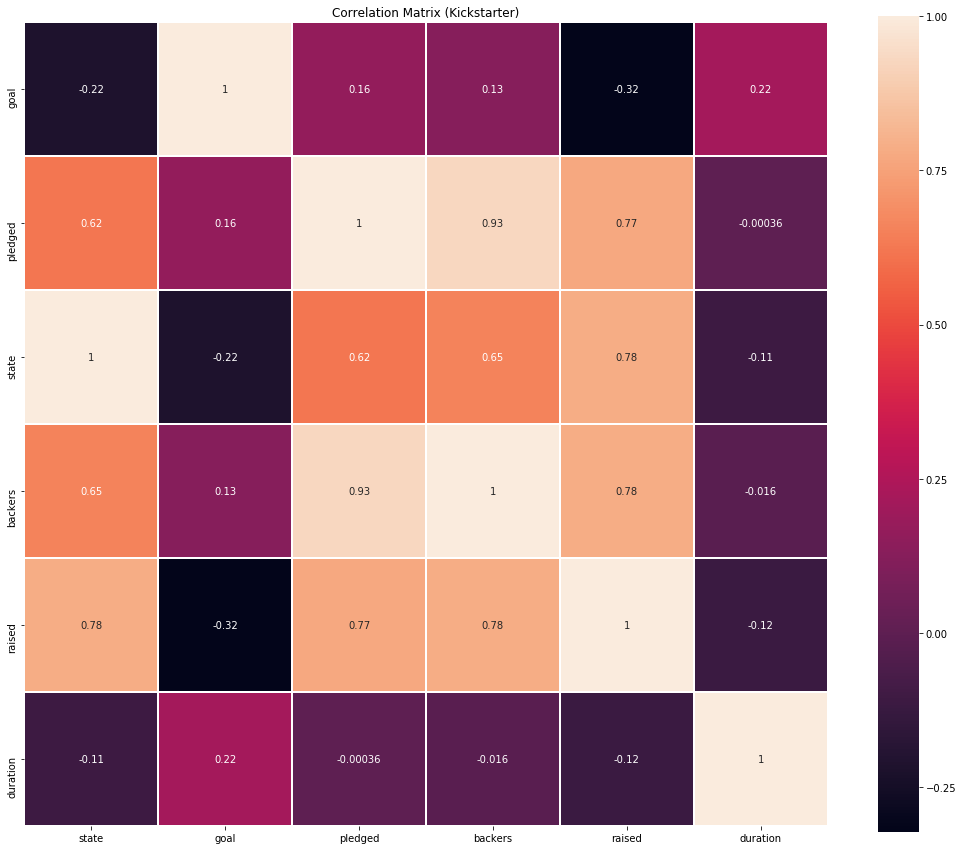

features are: ['goal', 'pledged', 'backers', 'raised', 'duration']


In [35]:
def draw_heatmap(df,corr_thresh=-1000):
    """ Draws heatmap out of a dataframe. 
        Set corr_thresh to 0 for full heatmap,
        or keep default for strong correlation
    """
    
    # make the correlation matrix.
    corr_mat = df.corr()

    # move the column to head of list using index, pop and insert
    cols = corr_mat.columns.to_list()
    print (cols)
    cols.insert(0, cols.pop(cols.index('state')))

    # reorder
    corr_mat = corr_mat.ix[:, cols]
    corr_mat.sort_values(by=['state'],ascending=False)

    # figure aesthetics
    plt.figure(figsize=(18,15))
    plt.plot()
    
    # draw the heatmap using seaborn.
    sns.heatmap(corr_mat[(corr_mat > corr_thresh)], square=True, annot=True, linewidths=.5)
    plt.title("Correlation Matrix (Kickstarter)")
    printmd("**Correlation Matrix (filtered for correlation above {}):**".format(corr_thresh))
    plt.show()
    
    # return features that correlate with the target equal to corr_thresh or higher
    features = corr_mat[(corr_mat > corr_thresh)]
    features = features.index[features['state'] >= corr_thresh].tolist()
    features.remove('state')
    print('features are: {}'.format(features))
    return features

# corr_thresh = 0.64
features = draw_heatmap(data_2016)

In [26]:
data_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.000,2012-03-17 03:24:11,1.000,failed,1,US,1.000,1.000,5000.000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.000,2015-07-04 08:35:03,1283.000,canceled,14,US,1283.000,1283.000,19500.000
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.000,2016-02-26 13:38:27,52375.000,successful,224,US,52375.000,52375.000,50000.000
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.000,2014-12-01 18:30:44,1205.000,successful,16,US,1205.000,1205.000,1000.000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.000,2016-02-01 20:05:12,453.000,failed,40,US,453.000,453.000,25000.000
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.000,2014-04-24 18:14:43,8233.000,canceled,58,US,8233.000,8233.000,125000.000
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.000,2014-07-11 21:55:48,6240.570,canceled,43,US,6240.570,6240.570,65000.000


# Check for class imbalance
# if imbalanced, use imbalanced-learn
# why u chose model
# wisely choose perfo metrics

In [27]:
KNeighborsRegressor().fit(data_2016[features],data_2016['state']).score(data_2016[features],data_2016['state'])

0.9481218382683689